In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# import utils
import sys
sys.path.append('../../../utils')
import calibrate, simulate, misc

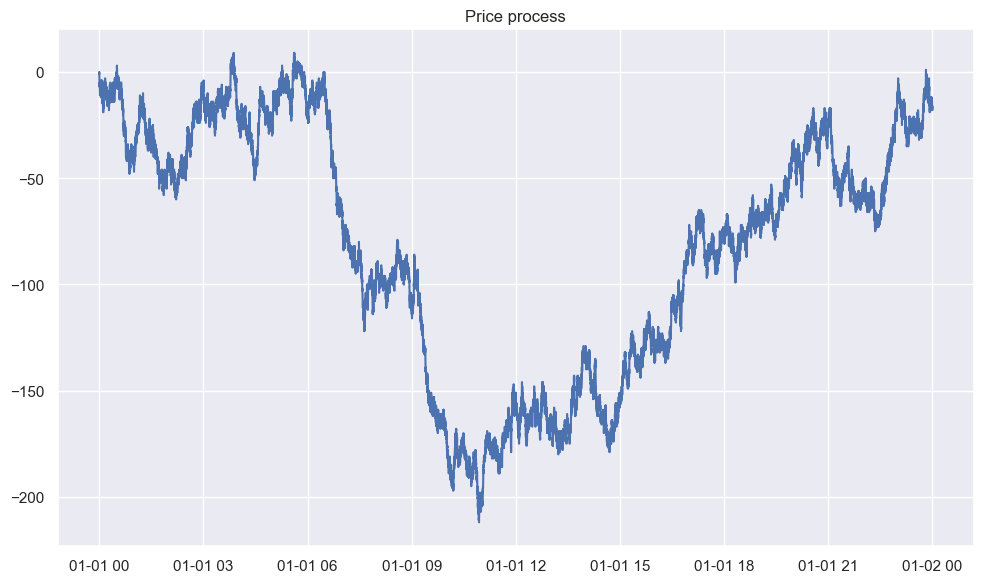

In [5]:
mu, alpha, beta = 0.16, 0.024, 0.11
theta = mu, alpha, beta
pp = simulate.PriceProcess(*theta)
T = 60*60*24 # 24 hours = 1 day
ts = pp.simulate(T)
# save to csv

# ts.to_csv('pp_96h_CAREFUL.csv')
pp.plot(ts)

In [ ]:
taus = misc.range_timedelta(100, 200000, 100, 'ms')

C_emp_values = [misc.C_emp(ts, tau) for tau in taus]
C_th_func = misc.C_th(theta)
C_th_values = [C_th_func(tau.total_seconds()) for tau in taus]

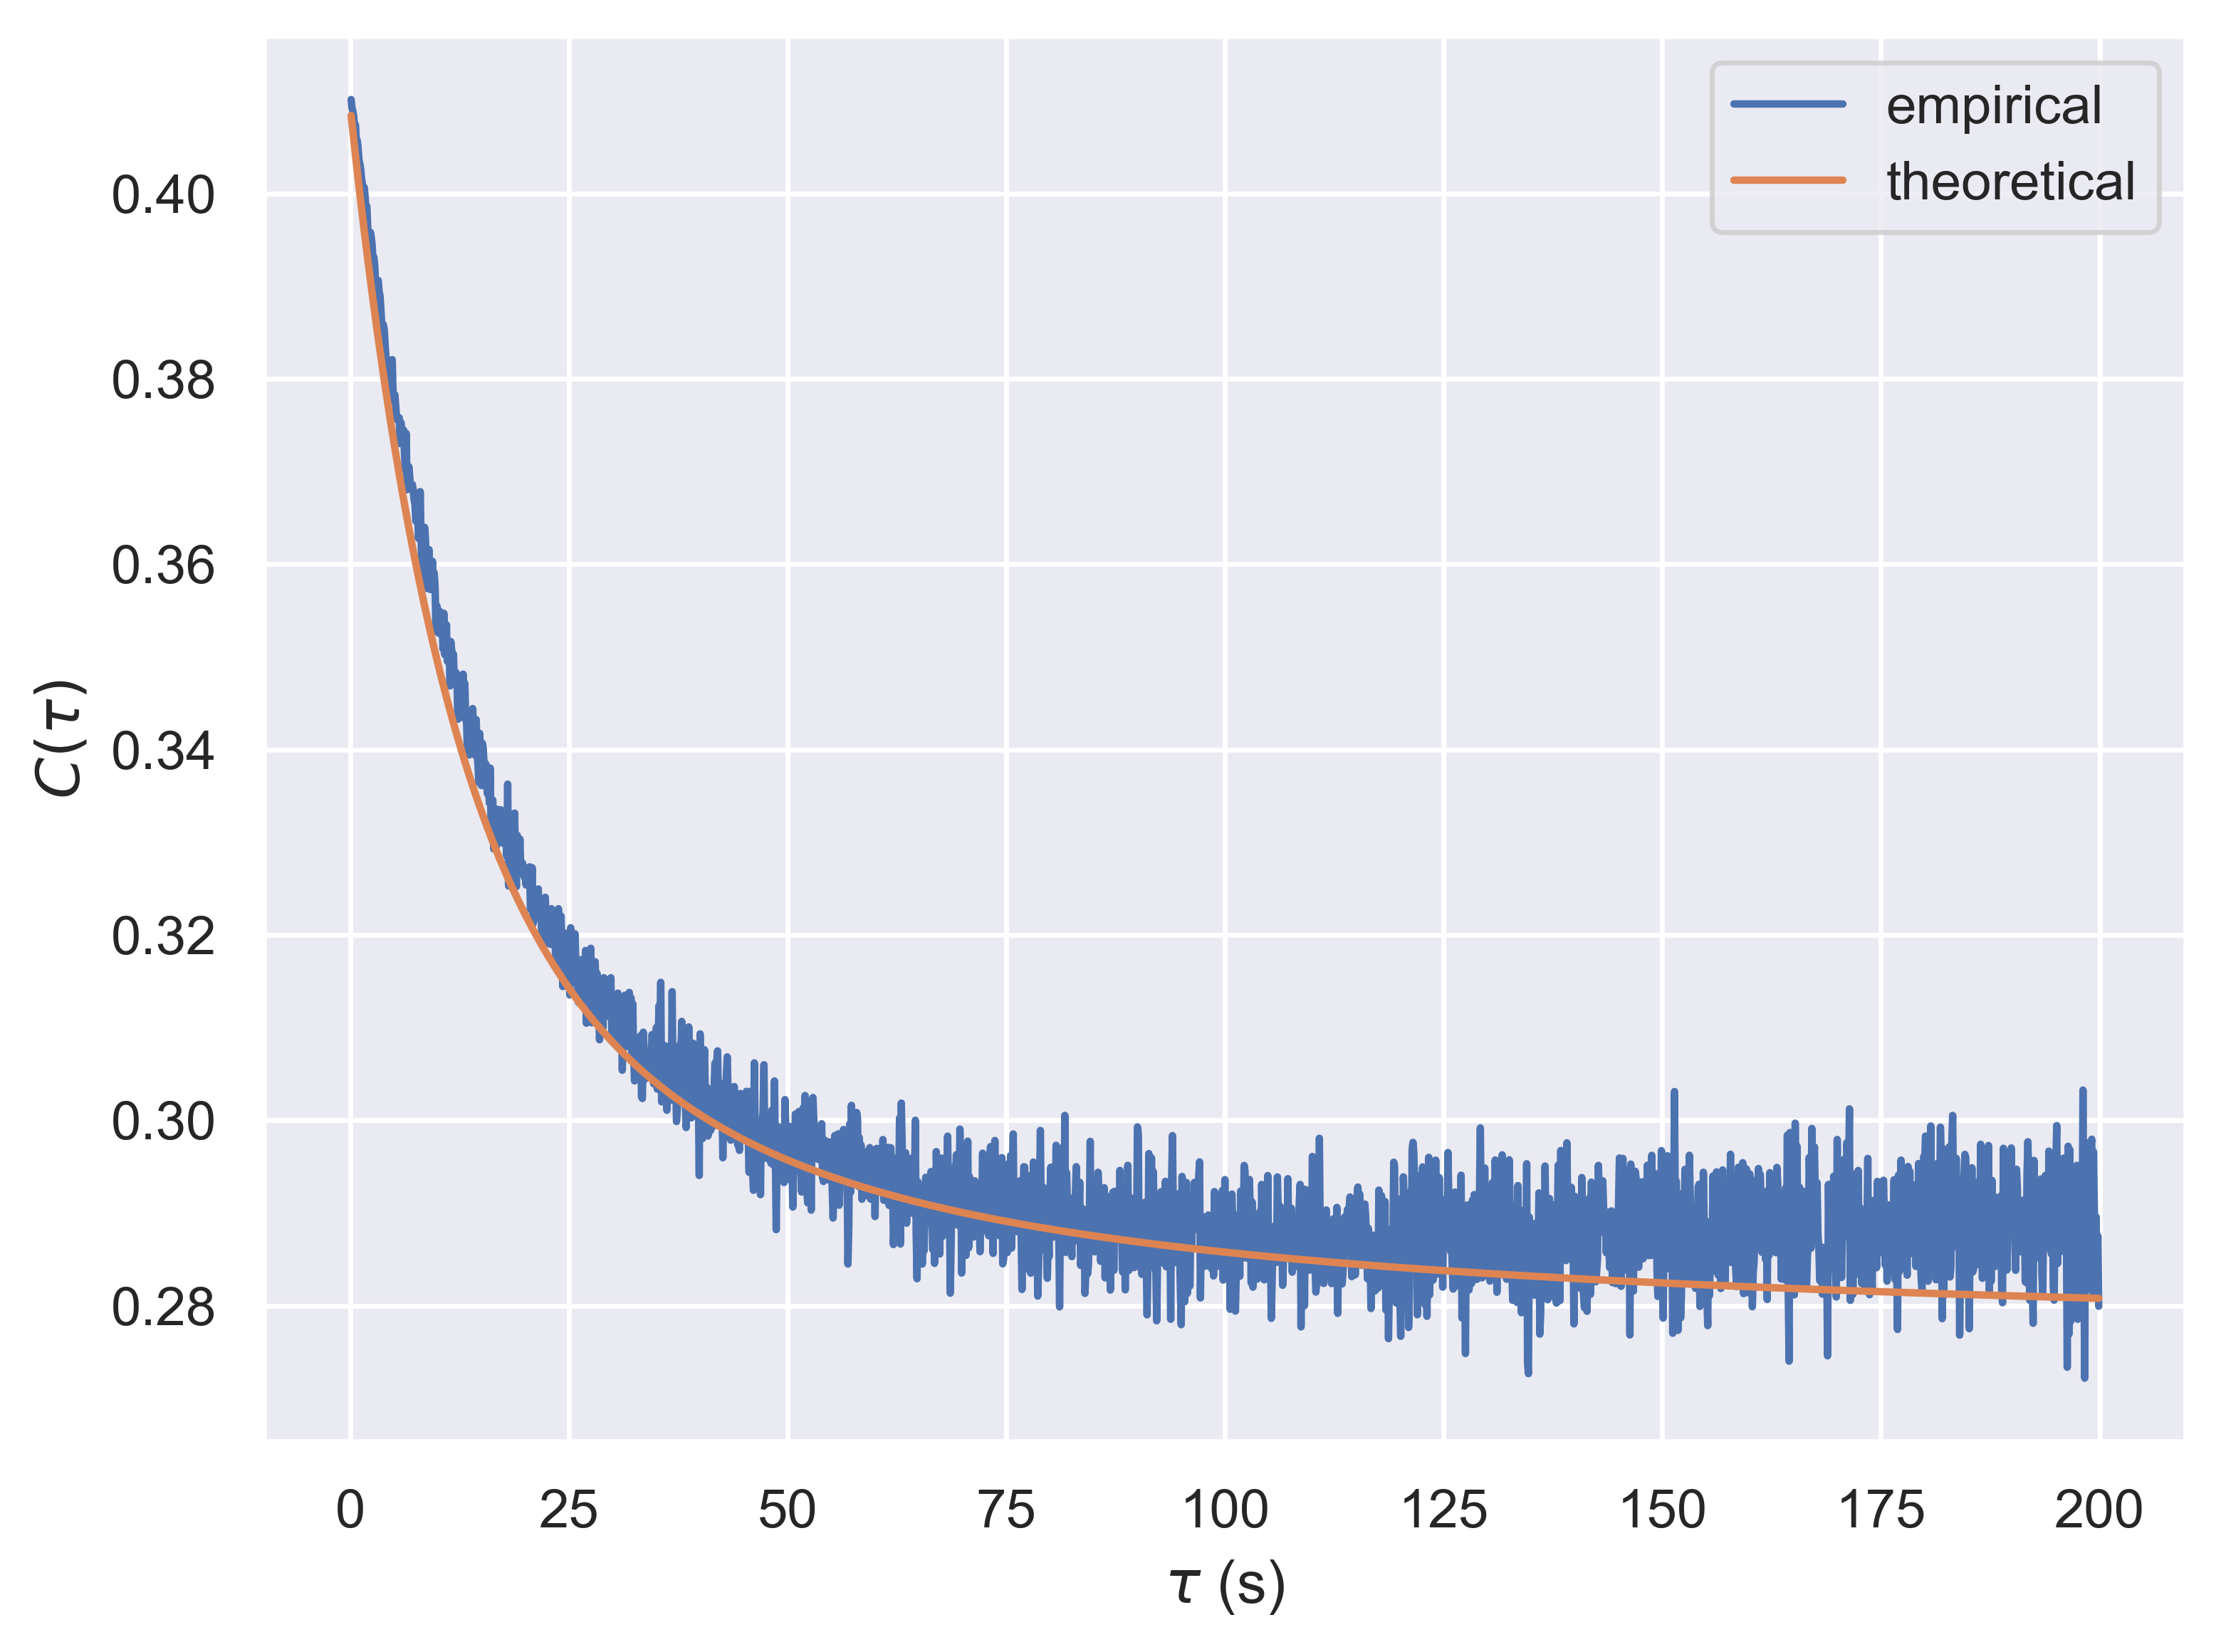

In [ ]:
plt.figure(dpi=500)
plt.plot(taus.dt.total_seconds(), C_emp_values, label='empirical')
plt.plot(taus.dt.total_seconds(), C_th_values, label='theoretical')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$C(\tau)$')
plt.legend()
plt.tight_layout()
plt.show()